## Using Naive Bayes to classify reviews on amazon as good or bad
the data set is from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#
From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
review_raw = pd.read_csv('amazon_review.txt', names=['message', 'score'], delimiter='\t')
# change the order of the columns
review_raw = review_raw[['score', 'message']]

#'score' 1 means positive score, 'score' 0 means negative one

review_raw.head()

,score,message
0,0,So there is no way for me to plug it in here i...
1,1,"Good case, Excellent value."
2,1,Great for the jawbone.
3,0,Tied to charger for conversations lasting more...
4,1,The mic is great.


- add some features (words) (find the words which doesn't intersect, add them to the df)
- check correspondence
- map in using heatmap 
- use naive bayes to check how good the model is

In [7]:
# positive list
positive = review_raw.loc[review_raw['score'] == True]
# negative list
negative = review_raw.loc[review_raw['score'] != True]

# count the most frequency used words
freq = 100
most_freq_positive_words = pd.Series(' '.join(positive['message']).lower().split()).value_counts()[:freq]
most_freq_negative_words = pd.Series(' '.join(negative['message']).lower().split()).value_counts()[:freq]


In [4]:
# create positive set of words
positive_set = {most_freq_positive_words.index[0]}

for i in most_freq_positive_words.index:
    positive_set.add(i)

# create negative set of words
negative_set = {most_freq_negative_words.index[0]}

for y in most_freq_negative_words.index:
     negative_set.add(y)

In [5]:
# find the intersection between the two sets
inter = positive_set.intersection(negative_set)

# print the top few used words that are only in the positive set
print("The {} most used words in only the positive set are:\n{}\n".format(len(positive_set - inter), positive_set - inter))
# print the top few used words that are only in the negative set
print("\nThe {} most used words in only the negative set are:\n{}".format(len(negative_set - inter), negative_set - inter))

The 21 most used words in only the positive set are:
{'well', "it's", 'great', 'quality', 'nice', 'headset', 'love', "i've", 'really', 'best', 'excellent', 'like', 'great.', 'good', 'recommend', 'phone.', 'sound', 'one', 'works', 'has', 'than'}


The 21 most used words in only the negative set are:
{'your', 'do', 'at', 'then', 'it.', "doesn't", 'out', 'work', 'when', 'if', 'no', 'get', 'after', 'only', 'not', 'me', 'use', 'be', 'or', 'does', "don't"}


In [12]:
# create a list of keywords by adding 5 words (that I believe have high correspondence to the outcome) 
# from each set (bad/ negative) to our df
keywords = ['quality', 'recommend', 'great', 'excellent', 'best', 'worst', 'only', "don't", 'bad', 'waste']

# add these columns and check if the word appears (T/F)
for key in keywords:
    review_raw[str(key)] = review_raw.message.str.contains(
        str(key), case=False
    )
    
review_raw.head()

,score,message,quality,recommend,great,excellent,best,worst,only,don't,bad,waste
0,0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False
1,1,"Good case, Excellent value.",False,False,False,True,False,False,False,False,False,False
2,1,Great for the jawbone.,False,False,True,False,False,False,False,False,False,False
3,0,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False
4,1,The mic is great.,False,False,True,False,False,False,False,False,False,False


              score   quality  recommend     great  excellent      best  \
score      1.000000  0.060222   0.092545  0.289256   0.154242  0.122713   
quality    0.060222  1.000000  -0.037812 -0.043658   0.076511  0.029118   
recommend  0.092545 -0.037812   1.000000 -0.013405   0.010316 -0.024984   
great      0.289256 -0.043658  -0.013405  1.000000  -0.054908 -0.026507   
excellent  0.154242  0.076511   0.010316 -0.054908   1.000000 -0.024984   
best       0.122713  0.029118  -0.024984 -0.026507  -0.024984  1.000000   
worst     -0.114766 -0.026051  -0.019118 -0.037829  -0.019118 -0.017213   
only      -0.086723 -0.003925   0.015599 -0.028136  -0.025559 -0.023012   
don't     -0.100543 -0.007976   0.011553 -0.053854  -0.027217 -0.024505   
bad       -0.119159  0.012381   0.032663 -0.039277  -0.019850 -0.017872   
waste     -0.127515 -0.028945  -0.021242 -0.042031  -0.021242 -0.019125   

              worst      only     don't       bad     waste  
score     -0.114766 -0.086723 -0.1005

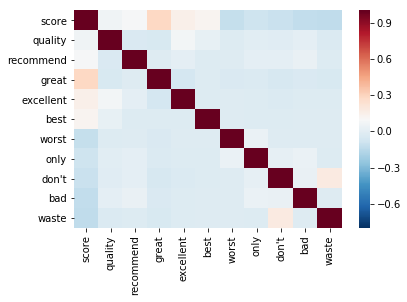

In [13]:
# checks the correlations between all the variables (we don't want features to be dependent on one another)
correlation = review_raw.corr()
print(correlation)

# see in heatmap 
sns.heatmap(correlation, cmap="RdBu_r", vmax=1, vmin= -.8)

Using the above info, it can be seen that the dependent variables don't have a high correlation between themselves, which is good. 
So, I'll use Naive Bayes to see how well we can recognize if the review is positive or negative reviews.

In [14]:
# Compare between different Naive Bayes

# SKlearn needs to have the target variable (dependent), and the indepdnent variables (data, df type)
data = review_raw[keywords]
target = review_raw['score']

# importing the classifiers from sklearn.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data, target)
gnb.fit(data, target)
mnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
x_pred = gnb.predict(data)
z_pred = mnb.predict(data)

# Display our results.
print("Using BernoulliNB - Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Using GaussianNB - Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != x_pred).sum()
))

print("Using MultinomialNB - Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != z_pred).sum()
))

Using BernoulliNB - Number of mislabeled points out of a total 1000 points : 353
Using GaussianNB - Number of mislabeled points out of a total 1000 points : 434
Using MultinomialNB - Number of mislabeled points out of a total 1000 points : 353


Bernoulli seems the most reasonable one to use since the result is binary. But for the matter of exploration, I also used Gaussian and Multinomial.
The Bernoulli did recognize the most but still missed about 1/3.
I believe that using a few more words from each category (positive/ negative) would make the result better.